In [1]:
from matplotlib import pyplot as plt
# from brokenaxes import brokenaxes
import numpy as np
import os
import sys
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D

my_figsize = [20, 10]
my_fontsize = 35
WIDTH = 0.05  # the width of the bars
SHORT = 100001-2 # 100KB
LONG = 1000000 # 1000KB
METRICS = ['FCT', 'GOODPUT']


os.chdir(sys.path[0])
os.chdir('./')

SCHEMES = ["dctcp/pureincast", "Zeropod/pureincast/ppt_16_bppn_5120"]

# acc_recdelay_uptimes = [[1, 1, 9], [1, 5, 45], [1, 10, 40], [1, 15, 35,],[1, 20, 30], [1, 20, 180], 
#                        [2, 5, 45], [2, 10, 40], [2, 10, 60], [2, 10, 80], [2, 15, 35], [2, 20, 30],
#                        [3, 5, 45], [3, 10, 40], [3, 15, 35], [3, 20, 30],
#                        [4, 5, 45], [4, 10, 40], [4, 15, 35], [4, 20, 30],
#                        ]
acc_recdelay_uptimes = [[1, 1, 9], [1, 5, 45], [1, 10, 40], [1, 15, 35],[1, 20, 30], [1, 20, 180], 
                       [2, 5, 45], [2, 10, 10], [2, 10, 20], [2, 10, 40], [2, 10 ,60], [2, 10, 80], [2, 10, 90], [2, 10, 100], [2, 10, 120], [2, 15, 35], [2, 20, 30],
                       [3, 5, 45], [3, 10, 40], [3, 10, 90], [3, 15, 35], [3, 20, 30],
                       ]
acc_recdelay_uptimes = [[2, 5, 45], [2, 10, 10], [2, 10, 20], [2, 10, 40], [2, 10, 60], [2, 10, 80], [2, 10, 90], [2, 10, 100], [2, 10, 120], [2, 15, 35], [2, 20, 30],
                       [3, 5, 45], [3, 10, 20], [3, 10, 40], [3, 10, 60], [3, 10, 80], [3, 10, 90], [3, 10, 100], [3, 10, 120], [3, 15, 35], [3, 20, 30],
                       ]
# 把acc_recdelay_uptimes的方括号变为圆括号
acc_recdelay_uptimes = [tuple(x) for x in acc_recdelay_uptimes]
# print(acc_recdelay_uptimes)

loads = [0.1, 0.25, 0.5, 0.75, 1]
loads = [1]

DATA_DIR_TEMP = '../DATA/Zeropod/Zeropod/multipods_W5/optical-oobcp/{acc}x_recdelay_{recdelay}_up_{up}/DATA_zeropod_W5_{load}/'
DATA_DIR_TEMP = '../DATA/Zeropod/Zeropod/singlepod_W5/optical-oobcp/{acc}x_recdelay_{recdelay}_up_{up}/DATA_zeropod_W5_{load}/'

data = {}
for acc_recdelay_uptime in acc_recdelay_uptimes:
    data[acc_recdelay_uptime] = {}
    for load in loads:
        data[acc_recdelay_uptime][load] = {}

    
for acc, recdelay, up in acc_recdelay_uptimes:
    # data[(acc, recdelay, up)]['PATH'] = dir_path
    for load in loads:
        dir_path = DATA_DIR_TEMP.format(acc=acc, recdelay=recdelay, up=up, load=load)
        for metric in METRICS:
            data_path = dir_path + metric + '.txt'
            data[(acc, recdelay, up)][load][metric] = np.loadtxt(data_path)
            print("LOADED: ", (acc, recdelay, up), load, metric)

for acc, recdelay, up in acc_recdelay_uptimes:
    for load in loads:
        for metric in METRICS:
            data[(acc, recdelay, up)][load]['SHORT_IDX'] = data[(acc, recdelay, up)][load]['FCT'][:, 4] < SHORT
            data[(acc, recdelay, up)][load]['LONG_IDX'] = data[(acc, recdelay, up)][load]['FCT'][:, 4] > LONG
            data[(acc, recdelay, up)][load]['MIDDLE_IDX'] = (data[(acc, recdelay, up)][load]['FCT'][:, 4] >= SHORT) * (data[(acc, recdelay, up)][load]['FCT'][:, 4] <= LONG)


LOADED:  (2, 5, 45) 1 FCT
LOADED:  (2, 5, 45) 1 GOODPUT
LOADED:  (2, 10, 10) 1 FCT
LOADED:  (2, 10, 10) 1 GOODPUT
LOADED:  (2, 10, 20) 1 FCT
LOADED:  (2, 10, 20) 1 GOODPUT
LOADED:  (2, 10, 40) 1 FCT
LOADED:  (2, 10, 40) 1 GOODPUT
LOADED:  (2, 10, 60) 1 FCT
LOADED:  (2, 10, 60) 1 GOODPUT
LOADED:  (2, 10, 80) 1 FCT
LOADED:  (2, 10, 80) 1 GOODPUT
LOADED:  (2, 10, 90) 1 FCT
LOADED:  (2, 10, 90) 1 GOODPUT
LOADED:  (2, 10, 100) 1 FCT
LOADED:  (2, 10, 100) 1 GOODPUT
LOADED:  (2, 10, 120) 1 FCT
LOADED:  (2, 10, 120) 1 GOODPUT
LOADED:  (2, 15, 35) 1 FCT
LOADED:  (2, 15, 35) 1 GOODPUT
LOADED:  (2, 20, 30) 1 FCT
LOADED:  (2, 20, 30) 1 GOODPUT
LOADED:  (3, 5, 45) 1 FCT
LOADED:  (3, 5, 45) 1 GOODPUT
LOADED:  (3, 10, 20) 1 FCT
LOADED:  (3, 10, 20) 1 GOODPUT
LOADED:  (3, 10, 40) 1 FCT
LOADED:  (3, 10, 40) 1 GOODPUT
LOADED:  (3, 10, 60) 1 FCT
LOADED:  (3, 10, 60) 1 GOODPUT
LOADED:  (3, 10, 80) 1 FCT
LOADED:  (3, 10, 80) 1 GOODPUT
LOADED:  (3, 10, 90) 1 FCT
LOADED:  (3, 10, 90) 1 GOODPUT
LOADED:  (3, 1

In [9]:

data['DCTCP'] = {}
for load in loads:
    data['DCTCP'][load] = {}
    for metric in METRICS:
        data_path = '../DATA/Zeropod/dctcp/multipods_W5/W5_incast_0.001/DATA_zeropod_W5_{load}/'.format(load=load) + metric + '.txt'
        data['DCTCP'][load][metric] = np.loadtxt(data_path)
        print("LOADED: ", 'DCTCP', load, metric)
        
for load in loads:
    for metric in METRICS:
        data['DCTCP'][load]['SHORT_IDX'] = data['DCTCP'][load]['FCT'][:, 4] < SHORT
        data['DCTCP'][load]['LONG_IDX'] = data['DCTCP'][load]['FCT'][:, 4] > LONG
        data['DCTCP'][load]['MIDDLE_IDX'] = (data['DCTCP'][load]['FCT'][:, 4] >= SHORT) * (data['DCTCP'][load]['FCT'][:, 4] <= LONG)



LOADED:  DCTCP 1 FCT
LOADED:  DCTCP 1 GOODPUT


In [2]:
coordinates = {}
flow_range = 'Elephant'
mode = '99p'
for acc, recdelay, up in acc_recdelay_uptimes:
    coordinates[(acc, recdelay, up)] = {}
    for load in loads:
        coordinates[(acc, recdelay, up)][load] = {}

        if flow_range == 'Mice':
            idx = data[(acc, recdelay, up)][load]['SHORT_IDX']
        elif flow_range == 'Elephant':
            idx = data[(acc, recdelay, up)][load]['LONG_IDX']
        elif flow_range == 'middle':
            idx = data[(acc, recdelay, up)][load]['MIDDLE_IDX']
        elif flow_range == 'all':
            idx = np.arange(len(data[(acc, recdelay, up)][load]['FCT']))

        available_idx = data[(acc, recdelay, up)][load]['FCT'][:, 7] > 0 # 过滤未完成的流
        idx = idx * available_idx

        fct = data[(acc, recdelay, up)][load]['FCT'][idx, 7] # fct
        # print(len(fct))

        
        # 计算FCT
        coordinates[(acc, recdelay, up)]['FCT'] = 0
        if mode == 'Mean':
            coordinates[(acc, recdelay, up)][load]['FCT'] = np.mean(fct) * 1e6
        elif mode == 'Median':
            coordinates[(acc, recdelay, up)][load]['FCT'] = np.percentile(fct, 50) * 1e6
        elif mode == '90p':
            coordinates[(acc, recdelay, up)][load]['FCT'] = np.percentile(fct, 90) * 1e6
        elif mode == '99p':
            coordinates[(acc, recdelay, up)][load]['FCT'] = np.percentile(fct, 99) * 1e6
        elif mode == '99.9p':
            coordinates[(acc, recdelay, up)][load]['FCT'] = np.percentile(fct, 99.9) * 1e6

        # 计算Goodput
        coordinates[(acc, recdelay, up)]['Goodput'] = 0
        idx = data[(acc, recdelay, up)][load]['GOODPUT'][:, 2] > 0
        goodput = data[(acc, recdelay, up)][load]['GOODPUT'][idx, 1] # goodput
        coordinates[(acc, recdelay, up)][load]['Goodput'] = np.mean(goodput)
        print((acc, recdelay, up), load, coordinates[(acc, recdelay, up)][load]['FCT'], coordinates[(acc, recdelay, up)][load]['Goodput'])


(2, 5, 45) 1 22847.658085177998 86.34190650419613
(2, 10, 10) 1 59450.27398590163 67.72936906436493
(2, 10, 20) 1 36301.44843922624 79.84704585572489
(2, 10, 40) 1 31808.34339391899 82.86554001161551
(2, 10, 60) 1 38834.90626697634 80.69805709283807
(2, 10, 80) 1 49870.54024089054 77.66649793559571
(2, 10, 90) 1 55264.81143561658 75.79800262925414
(2, 10, 100) 1 59893.14599906518 74.27642164775847
(2, 10, 120) 1 69244.14539022473 70.5086769250085
(2, 15, 35) 1 43664.66397081043 77.40471973943538
(2, 20, 30) 1 57646.22915230945 70.5535904762937
(3, 5, 45) 1 7337.4255540255235 91.38605816130611
(3, 10, 20) 1 10287.30050454069 90.42610923727673
(3, 10, 40) 1 10411.112325534217 90.74142599952921
(3, 10, 60) 1 14483.649369394829 89.84871524806194
(3, 10, 80) 1 24093.660823168044 87.84651524269464
(3, 10, 90) 1 30584.16807516146 86.28409189260287
(3, 10, 100) 1 37237.336843064906 84.76402161737529
(3, 10, 120) 1 52614.21972586657 80.88025899278485
(3, 15, 35) 1 14495.007626464818 89.39639622

In [ ]:
# 引入DCTCP和IDEAL


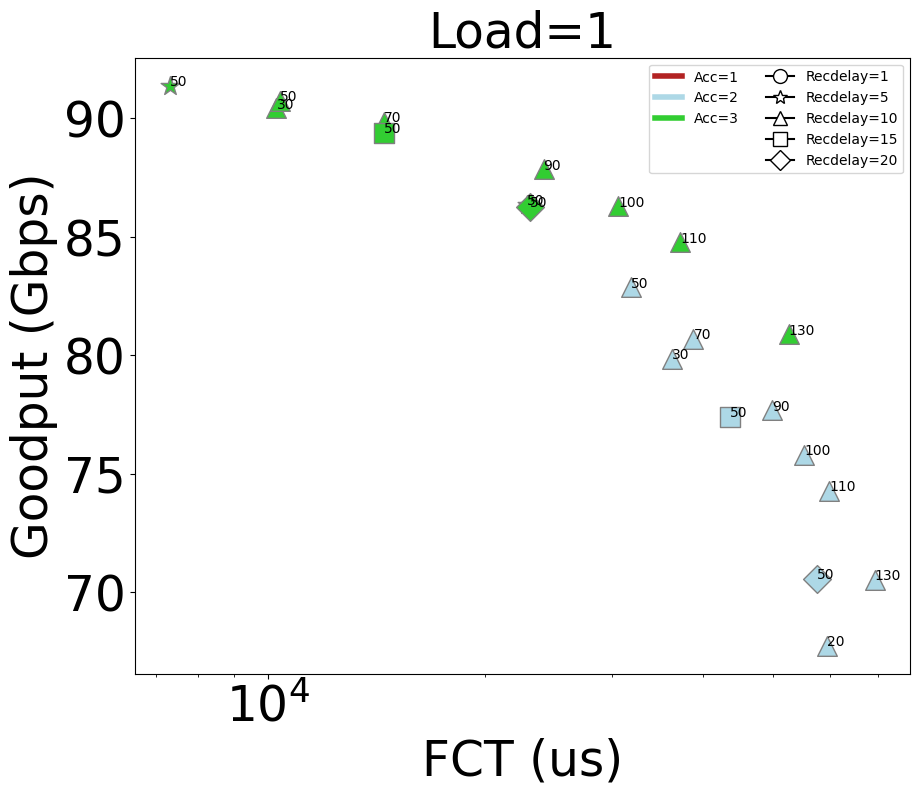

In [3]:
## 画图

    # for plot_index, workload in enumerate(workloads):
my_figsize = [20, 10]
my_figsize = [10, 8]
legend_elements = []
# fig, axs = plt.subplots(nrows=2, ncols=3, figsize=my_figsize)
for plot_index, load in enumerate(loads):
    _, ax = plt.subplots(figsize=my_figsize)
    # ax = axs[int(plot_index/3), plot_index%3]
    for acc, recdelay, up in acc_recdelay_uptimes:
    
        x = coordinates[(acc, recdelay, up)][load]['FCT']
        y = coordinates[(acc, recdelay, up)][load]['Goodput']
        colors = {
            1: 'firebrick',
            2: 'lightblue',
            3: 'limegreen',
            4: 'royalblue',
        }
        markers = {
            1: 'o',
            5: '*',
            10: '^',
            15: 's',
            20: 'D',
        }
        scatter = ax.scatter(x, y, s=200, label='{}x_recdelay_{}_up_{}'.format(acc, recdelay, up), color=colors[acc], edgecolors='grey', marker=markers[recdelay])
        legend_elements.append(scatter)
        ax.annotate('{}'.format(up+recdelay), (x, y), fontsize=10)

    ax.set_ylabel('Goodput (Gbps)', fontsize=my_fontsize)
    ax.set_xlabel('FCT (us)', fontsize=my_fontsize)
    
    ax.set_xscale('log')
    ax.tick_params(axis='x', labelsize=my_fontsize)
    ax.tick_params(axis='y', labelsize=my_fontsize)
    legend_elements = [Line2D([0], [0], color='firebrick', lw=4, label='Acc=1'),
                   Line2D([0], [0], color='lightblue', lw=4, label='Acc=2'),
                   Line2D([0], [0], color='limegreen', lw=4, label='Acc=3'),
                   Line2D([0], [0], color='w', lw=4, label=''),
                   Line2D([0], [0], color='w', lw=4, label=''),
                   Line2D([0], [0], marker='o', color='k', label='Recdelay=1', markerfacecolor='w', markersize=10),
                   Line2D([0], [0], marker='*', color='k', label='Recdelay=5', markerfacecolor='w', markersize=10),
                   Line2D([0], [0], marker='^', color='k', label='Recdelay=10', markerfacecolor='w', markersize=10),
                   Line2D([0], [0], marker='s', color='k', label='Recdelay=15', markerfacecolor='w', markersize=10),
                   Line2D([0], [0], marker='D', color='k', label='Recdelay=20', markerfacecolor='w', markersize=10),]
    ax.legend(handles=legend_elements, loc='upper right', ncol=2, fontsize=10)
    # ax.legend(handles=legend_elements, loc='center right', ncol=2, fontsize=10)
    ax.set_title('Load={}'.format(load), fontsize=my_fontsize)
# Add legend with two columns
# legend1 = ax.legend(handles=legend_elements, loc='upper left', title='acc', ncol=2)
# legend2 = ax.legend(handles=legend_elements, loc='upper right', title='recdelay', ncol=2)
# ax.add_artist(legend1)
# ax.add_artist(legend2)


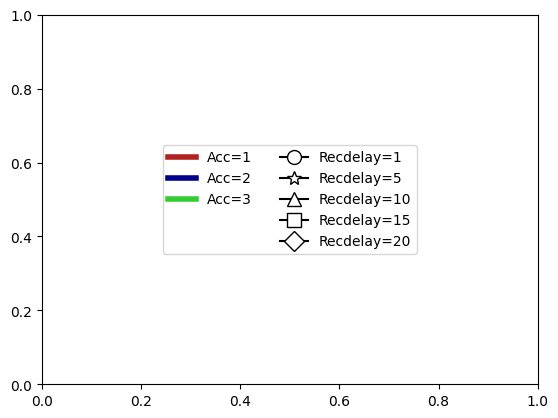

In [6]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], color='firebrick', lw=4, label='Acc=1'),
                   Line2D([0], [0], color='darkblue', lw=4, label='Acc=2'),
                   Line2D([0], [0], color='limegreen', lw=4, label='Acc=3'),]

# Create the figure
# fig, ax = plt.subplots()
# ax.legend(handles=legend_elements, loc='center')

legend_elements = [Line2D([0], [0], color='firebrick', lw=4, label='Acc=1'),
                   Line2D([0], [0], color='darkblue', lw=4, label='Acc=2'),
                   Line2D([0], [0], color='limegreen', lw=4, label='Acc=3'),
                   Line2D([0], [0], color='w', lw=4, label=''),
                   Line2D([0], [0], color='w', lw=4, label=''),
                   Line2D([0], [0], marker='o', color='k', label='Recdelay=1', markerfacecolor='w', markersize=10),
                   Line2D([0], [0], marker='*', color='k', label='Recdelay=5', markerfacecolor='w', markersize=10),
                   Line2D([0], [0], marker='^', color='k', label='Recdelay=10', markerfacecolor='w', markersize=10),
                   Line2D([0], [0], marker='s', color='k', label='Recdelay=15', markerfacecolor='w', markersize=10),
                   Line2D([0], [0], marker='D', color='k', label='Recdelay=20', markerfacecolor='w', markersize=10),]

# Create the figure
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='center', ncol=2)


plt.show()

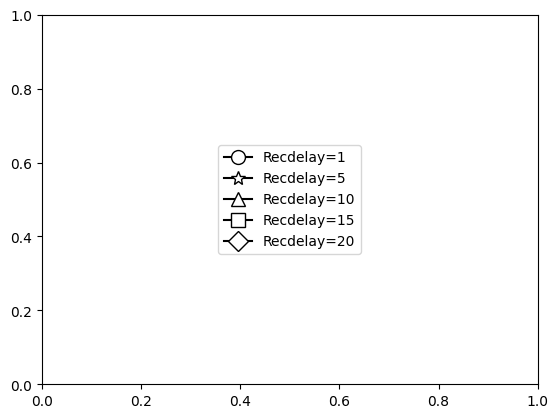

In [7]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='k', label='Recdelay=1', markerfacecolor='w', markersize=10),
                   Line2D([0], [0], marker='*', color='k', label='Recdelay=5', markerfacecolor='w', markersize=10),
                   Line2D([0], [0], marker='^', color='k', label='Recdelay=10', markerfacecolor='w', markersize=10),
                   Line2D([0], [0], marker='s', color='k', label='Recdelay=15', markerfacecolor='w', markersize=10),
                   Line2D([0], [0], marker='D', color='k', label='Recdelay=20', markerfacecolor='w', markersize=10),]

# Create the figure
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='center')

plt.show()